In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install mendeleev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 31.8 MB/s eta 0:00:00


In [3]:
pip install bilby

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.3/832.3 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00


In [4]:
pip install pymultinest==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [5]:
pip install juliet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend

In [6]:
import math
import sys
import numpy as np
import pandas as pd
from numpy import linspace, arange, zeros
from matplotlib.pylab import plt
from mendeleev import element
from bilby import result
import bilby
import seaborn as sns

In [7]:
label = 'ldm'
outdir = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [9]:
Z, N, BE_EXP = np.loadtxt('exp_full.dat',usecols=(0,1,2), unpack= True)
A = Z + N
az = np.vstack((A,Z))
x = az

data = -BE_EXP
ndata = len(data)
P = open('results.out','w')
print('ndata=',ndata, file=P)

In [11]:
df=pd.read_csv("exp_full.dat")

In [ ]:
df

,8 8 127.619293
0,10 10 160.644806
1,12 12 198.257019
2,14 14 236.536835
3,16 16 271.780273
4,18 18 306.716736
5,20 20 342.052032
6,22 22 375.474792
7,24 24 411.466095
8,26 26 447.699097
9,28 28 483.991699


In [12]:
df.describe()

,8 8 127.61929600000001
count,577
unique,577
top,10 6 97.321151999999998
freq,1


In [13]:
def model(az,a_v,a_s,a_a,a_c):
    a=az[0,:]
    z=az[1,:]
    a13 = pow(a,0.3333)
    zz1 = z*z
    nz = a -2*z
    nz2 = pow(nz , 2.0)
    BE=  a_v*a + a_s*a**(2.0/3.0)+ a_c*zz1/a13 + a_a*(nz2/a)
    return BE

In [14]:
# Now we define the injection parameters which we make simulated data with
#injection_parameters = dict(a_v=-15.8, a_s=18.3, a_a=23.2, a_c=0.714)
injection_parameters = dict(a_v=-14, a_s=18, a_a=23, a_c=0.7)
n = len(Z)
#n = len(az[1])
sigma = np.random.normal(1, 0.01, n)
sigma = 3.075

In [15]:
likelihood = bilby.likelihood.GaussianLikelihood(az, data, model,
sigma)

In [16]:
priors = dict()
priors['a_v'] = bilby.core.prior.Gaussian(-10,-30 , '$a_v$',unit='MeV')
priors['a_s'] = bilby.core.prior.Gaussian(0,23, '$a_s$',unit='MeV')
priors['a_a'] = bilby.core.prior.Gaussian(15, 50, '$a_a$',unit='MeV')
priors['a_c'] = bilby.core.prior.Gaussian(1,3,'$a_c$',unit='MeV')


In [ ]:
#print(pd.mean('a_v'))

In [17]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

05:00 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir'
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
05:00 bilby INFO    : Analysis priors:
05:00 bilby INFO    : a_v=Gaussian(mu=-10, sigma=-30, name='$a_v$', latex_label='$a_v$', unit='MeV', boundary=None)
05:00 bilby INFO    : a_s=Gaussian(mu=0, sigma=23, name='$a_s$', latex_label='$a_s$', unit='MeV', boundary=None)
05:00 bilby INFO    : a_a=Gaussian(mu=15, sigma=50, name='$a_a$', latex_label='$a_a$', unit='MeV', boundary=None)
05:00 bilby INFO    : a_c=Gaussian(mu=1, sigma=3, name='$a_c$', latex_label='$a_c$', unit='MeV', boundary=None)
05:00 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
05:00 bilby INFO    : Analysis likelihood noise evidence: nan
05:00 bilby INFO    : Single likelihood evaluation took 2.073e-04 s
05:00 bilby INFO    : 

1it [00:00, ?it/s]

05:03 bilby INFO    : Written checkpoint file outdir/ldm_resume.pickle
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImpo

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

-1500.2103794950033 0.2934897936957009 -inf


<ipython-input-17-1ca3e35613c3>:8: RuntimeWarning: divide by zero encountered in log
  np.log(result.occam_factor(priors)))


In [18]:
av_fit=result.get_one_dimensional_median_and_error_bar('a_v')
av1 = av_fit.median
as_fit=result.get_one_dimensional_median_and_error_bar('a_s')
as1 = as_fit.median
aa_fit=result.get_one_dimensional_median_and_error_bar('a_a')
aa1 = aa_fit.median
ac_fit=result.get_one_dimensional_median_and_error_bar('a_c')
ac1 = ac_fit.median
print(av1,as1,aa1,ac1)
data_fit = model(az,av1,as1,aa1,ac1)

-15.395305132129572 16.379516313195783 22.792987434614503 0.6950152216653729


In [19]:
cov_mat = result.covariance_matrix
nrow,ncol=np.shape(cov_mat)
print('row and columns',nrow,ncol)
corr=np.empty((nrow,ncol))
for i in range(0,nrow):
    for j in range(0,ncol):
        corr[i][j]=cov_mat[i][j] /np.sqrt(cov_mat[i][i]*cov_mat[j][j])
#output=open('results.out','w')
np.set_printoptions(precision=3)
#print(corr,file=output)
#print('Correlationmatrix',file=P)
#print(corr,file=P)
#utput.close()
print(corr)

row and columns 4 4
[[ 1.    -0.992 -0.885 -0.982]
 [-0.992  1.     0.864  0.954]
 [-0.885  0.864  1.     0.842]
 [-0.982  0.954  0.842  1.   ]]


In [20]:
print(corr)

[[ 1.    -0.992 -0.885 -0.982]
 [-0.992  1.     0.864  0.954]
 [-0.885  0.864  1.     0.842]
 [-0.982  0.954  0.842  1.   ]]


<Axes: >

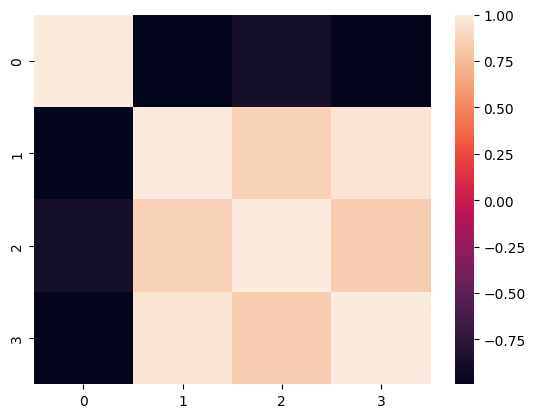

In [21]:
sns.heatmap(corr)

In [22]:
print('Parameters', file =P)
data1 = { 'av':[av_fit.median], 'plus':[av_fit.plus], 'minus':[av_fit.minus]}
data2 = { 'as':[as_fit.median], 'plus':[as_fit.plus], 'minus':[as_fit.minus]}
data3 = { 'aa':[aa_fit.median], 'plus':[aa_fit.plus], 'minus':[aa_fit.minus]}
data4 = { 'ac':[ac_fit.median], 'plus':[ac_fit.plus], 'minus':[ac_fit.minus]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
print(df1.to_string(index=False),file=P)
print(df2.to_string(index=False),file=P)
print(df3.to_string(index=False),file=P)
print(df4.to_string(index=False),file=P)

In [23]:
H=open('fit.out','w')

data6={'Z':Z, 'N':N, 'BE_EXP':BE_EXP, 'BE_FIT':data_fit}
df=pd.DataFrame(data6)
print(df.to_string(index=False),file=H)
H.close()

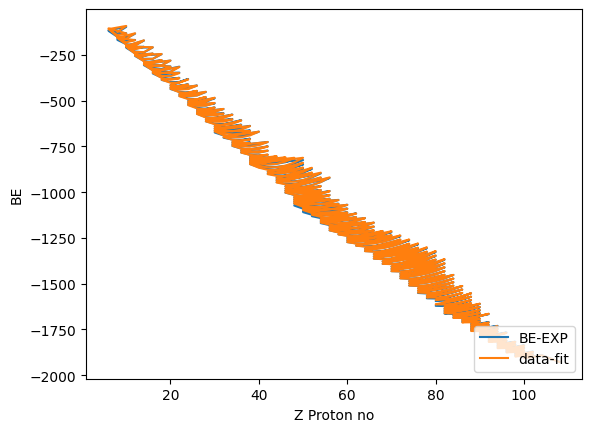

In [24]:
# plotting the points
plt.plot(Z,-BE_EXP )
plt.plot(Z, data_fit)

# naming the x axis
plt.xlabel('Z Proton no')
# naming the y axis
plt.ylabel('BE')

# Function add a legend
plt.legend(["BE-EXP", "data-fit"], loc ="lower right")

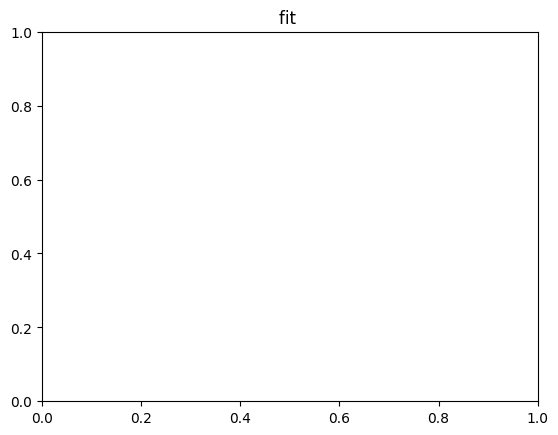

In [25]:
# giving a title to my graph
plt.title('fit ')

# function to show the plot

plt.savefig('fit.png') #.format(outdir, label))

In [26]:
plt.show()
chisq = np.sum(((data-data_fit)/sigma)**2.0)
#J = open('chi.out','w')
data5={'Chi2=':[chisq]}
df5 = pd.DataFrame(data5)
print(df5.to_string(index=False),file=P)
#J.close()

P.close()
print ('chisq',chisq)

chisq 578.2666838740565


In [ ]:
#for all data points

In [ ]:
#for all data points

In [27]:
label = 'ldm'
outdir1 = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir1)

In [ ]:
Z_1, N_1, BE_EXP_1 = np.loadtxt('audibe-in.dat',usecols=(1,0,3), unpack= True)
A_1 = Z_1 + N_1
az_1 = np.vstack((A_1,Z_1))
x_1 = az_1

data_1 = -BE_EXP_1
ndata_1 = len(data)
P = open('results1.out','w')
print('ndata_1=',ndata_1, file=P)

In [ ]:
#z, N, A, Total B

In [ ]:
def model1(az_1,a_v_1,a_s_1,a_a_1,a_c_1):
    a_1=az_1[2,:]
    z_1=az_1[1,:]
    a13_1 = pow(a_1,0.3333)
    zz1_1 = z_1*z_1
    nz_1 = a_1 -2*z_1
    nz2_1 = pow(nz_1 , 2.0)
    BE_1=  a_v_1*a_1 + a_s_1*a_1**(2.0/3.0)+ a_c_1*zz1_1/a13_1 + a_a_1*(nz2_1/a_1)
    return BE_1

In [ ]:
injection_parameters_1 = dict(a_v_1=-14, a_s_1=18, a_a_1=23, a_c_1=0.7)
n_1 = len(Z_1)
sigma_1 = np.random.normal(1, 0.01, n)
sigma_1 = 3.075

In [ ]:
likelihood_1 = bilby.likelihood.GaussianLikelihood(az_1, data_1, model1,
sigma_1)

In [ ]:
priors = dict()
priors['a_v'] = bilby.core.prior.Uniform(-30,-10 , '$a_v$',unit='MeV')
priors['a_s'] = bilby.core.prior.Uniform(0,23, '$a_s$',unit='MeV')
priors['a_a'] = bilby.core.prior.Uniform(15, 50, '$a_a$',unit='MeV')
priors['a_c'] = bilby.core.prior.Uniform(1,3,'$a_c$',unit='MeV')
#priors['a_p'] = bilby.core.prior.Uniform(0.5,34,'$a_p$', unit='MeV' )

In [ ]:
results_1 = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

11:17 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir'
/usr/local/lib/python3.10/dist-packages/bilby/core/utils/log.py:73: DeprecationWarning: Accessing attr.__version__ is deprecated and will be removed in a future release. Use importlib.metadata directly to query for attrs's packaging metadata.
  vdict[key] = str(getattr(sys.modules[key], "__version__", "N/A"))
11:17 bilby INFO    : Analysis priors:
11:17 bilby INFO    : a_v=Uniform(minimum=-30, maximum=-10, name='$a_v$', latex_label='$a_v$', unit='MeV', boundary=None)
11:17 bilby INFO    : a_s=Uniform(minimum=0, maximum=23, name='$a_s$', latex_label='$a_s$', unit='MeV', boundary=None)
11:17 bilby INFO    : a_a=Uniform(minimum=15, maximum=50, name='$a_a$', latex_label='$a_a$', unit='MeV', boundary=None)
11:17 bilby INFO    : a_c=Uniform(minimum=1, maximum=3, name='$a_c$', latex_label='$a_c$', unit='MeV', boundary=None)
11:17 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLike

-89.13887633580393 0.2238172178498014 -23.690608538066282
